# Historical graphing
A first ever attempt at pulling in data from the web and then graphing it 

In [1]:
# load some libraries
import pandas as pd
import numpy as np
#next line seems necessary atm based on https://stackoverflow.com/questions/50394873/import-pandas-datareader-gives-importerror-cannot-import-name-is-list-like
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading data from website
start_dt = '2000-1-1'

spx = web.DataReader(name='SP500', data_source='fred',start = start_dt).dropna()
vix = web.DataReader(name='VIXCLS', data_source='fred',start = start_dt).dropna()
us_hy = web.DataReader(name='BAMLHYH0A0HYM2TRIV', data_source='fred',start = start_dt).dropna()
us_ig = web.DataReader(name='BAMLCC0A0CMTRIV', data_source='fred',start = start_dt).dropna()

#combine into a single dataframe and summarise it
markets = pd.concat([spx,vix,us_hy,us_ig], axis=1).dropna()
markets.columns = ['spx', 'vix','us_hy','us_ig']
markets.describe()

,spx,vix,us_hy,us_ig
count,2515.000000,2515.000000,2515.000000,2515.000000
mean,1779.903316,18.271022,975.940667,2427.250493
std,564.862409,7.229690,209.895860,350.564165
min,676.530000,9.140000,424.720000,1521.770000
25%,1287.040000,13.270000,818.280000,2162.780000
50%,1833.320000,16.230000,1011.530000,2474.080000
75%,2138.140000,21.120000,1123.875000,2735.750000
max,2930.750000,52.650000,1297.010000,2910.770000


In [3]:
#choose one of the indices I've loaded in as spx, vix, us_hy, us_ig
selection = 'spx'

#generate returns, rolling returns and rolling vol
markets['return'] = np.log(markets[selection]/markets[selection].shift(1))
markets['30D'] = markets[selection].rolling(window=30).mean()
markets['90D'] = markets[selection].rolling(window=90).mean()
markets['90-30'] = markets['90D'] - markets['30D']
markets['vol'] = markets['return'].rolling(window=60).std()*np.sqrt(252)

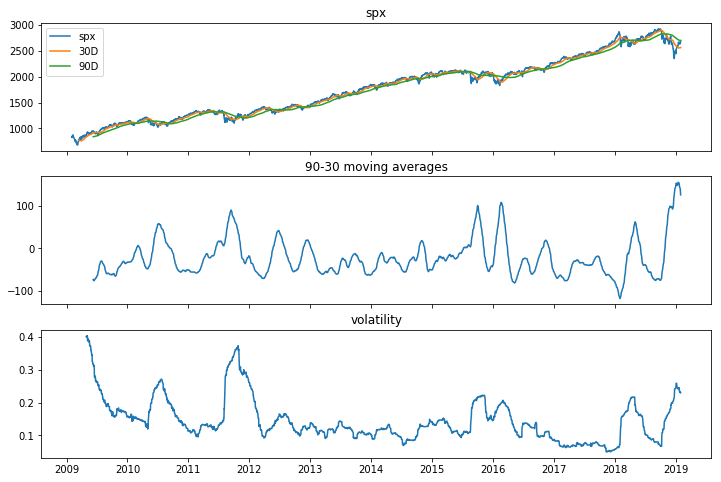

In [4]:
#Creates subplots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3,sharex=True,figsize=(12,8))
ax1.plot(markets[selection])
ax1.plot(markets['30D'])
ax1.plot(markets['90D'])
ax1.legend()
ax1.set_title(selection)
ax2.plot(markets['90-30'])
ax2.set_title('90-30 moving averages')
ax3.plot(markets['vol'])
ax3.set_title('volatility');

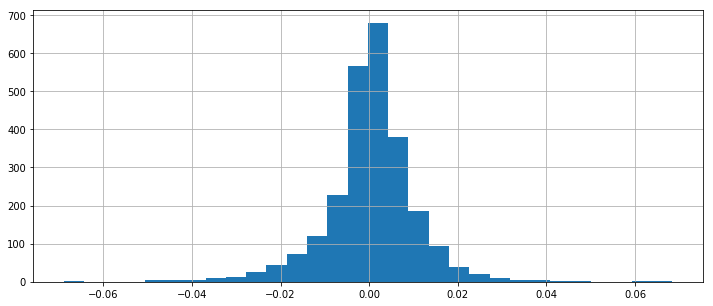

In [5]:
markets['return'].dropna().hist(bins=30,figsize=(12,5));